In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected = True)

In [2]:
data = pd.read_csv('013 IndexE8.csv')

In [3]:
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
data.date = pd.to_datetime(data.date, dayfirst=False)

In [5]:
data.head()

,date,spx,dax,ftse,nikkei
0,1994-07-01,469.90,2224.95,3445.98,18124.01
1,1994-10-01,475.27,2225.00,3440.58,18443.44
2,1994-11-01,474.13,2228.10,3413.77,18485.25
3,1994-12-01,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
data.tail()

,date,spx,dax,ftse,nikkei
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88
6268,2018-01-29,2853.528411,13324.48,7671.533300,23629.34


In [7]:
df_dax = data[['date', 'dax']]

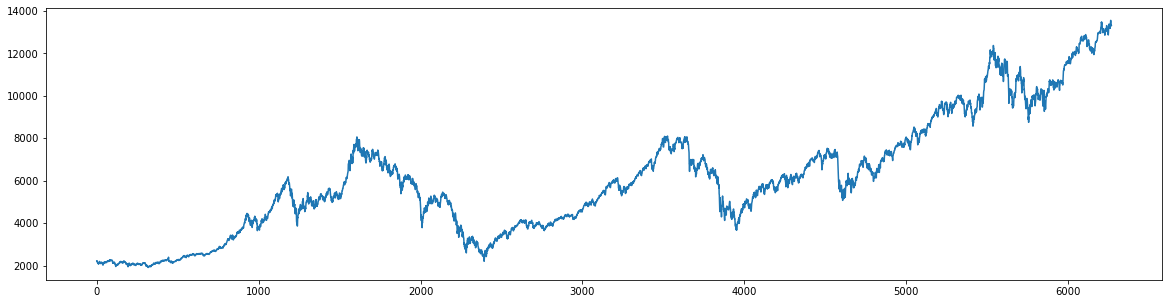

In [8]:
df_dax.dax.plot(figsize=(20,5))
plt.show()

In [9]:
#Model
df_dax = df_dax.rename(columns={'date':'ds', 'dax':'y'})

In [10]:
from fbprophet import Prophet

In [11]:
model = Prophet(daily_seasonality=True)
model.fit(df_dax)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [12]:
future = model.make_future_dataframe(periods=365)
future.head()

,ds
0,1994-01-02
1,1994-01-03
2,1994-01-04
3,1994-01-06
4,1994-01-07


In [13]:
future.tail()

,ds
6629,2019-11-27
6630,2019-11-28
6631,2019-11-29
6632,2019-11-30
6633,2019-12-01


In [14]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_upper', 'yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
6629,2019-11-27,14195.994757,15223.364304,13207.185931
6630,2019-11-28,14182.887513,15110.970876,13338.177677
6631,2019-11-29,14181.930268,15089.340282,13288.033964
6632,2019-11-30,14182.358288,15143.155365,13237.826122
6633,2019-12-01,14193.939540,15113.393864,13207.360835


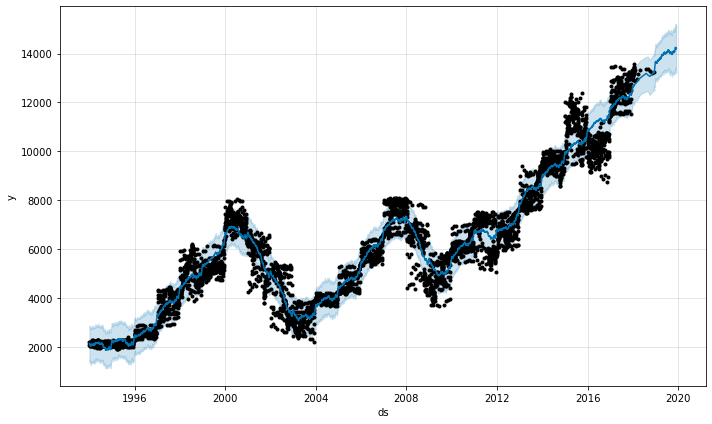

In [15]:
fig1 = model.plot(forecast)

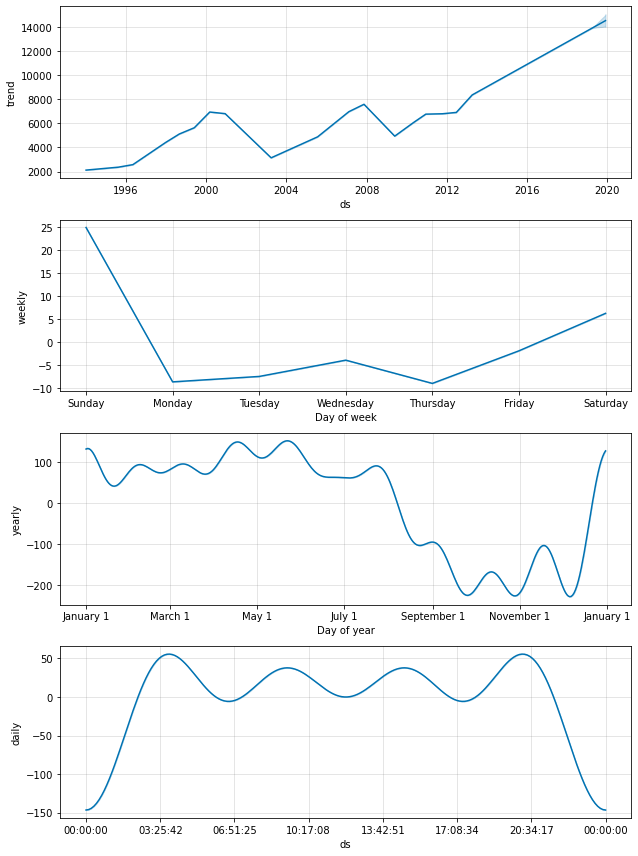

In [16]:
fig2 = model.plot_components(forecast)